**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: <font color="#0679c8">Rodrigo González Rodríguez</font>
*   MATRÍCULA: <font color="#0679c8">A01796932</font>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/01 - Ciencia y analítica de datos/4.2 - EDA"
os.chdir(DIR)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

<font color="#0679c8">Hay 8 columnas numericas(int64 y float64) y 4 columnas cualitativas(object)</font>

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

 <font color="#0679c8">Solo hay dos columnas con valores faltantes, a "person_emp_length" le falta un 2.7% y a "loan_int_rate" un 9.5% </font>

In [86]:
# person_emp_length missing percantage = ((32581 -31686) / 32581)*100 = 2.7%
# loan_int_rate missing percantage = ((32581 - 29465) / 32581)*100 = 9.5%
(df.isnull().sum() / df.shape[0]) * 100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)

<font color="#0679c8">El metodo describe() resuelve los dos puntos anteriores</font>
*   Forma (asimetría y curtosis)

<font color="#0679c8">Para este punto, usamos los métodos skew() y kurt() con el parámetro numeric_only=True para descartar las columnas cualitativas.</font>
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

<font color="#0679c8">Para person_age, tenemos una asimetría con sesgo a la derecha (2.5) y una curtosis leptocúrtica (18.5), lo que indica la presencia de un pico bastante pronunciado.</font>

<font color="#0679c8">Para loan_int_rate, tenemos una asimetría cercana a cero (0.2), lo que indica que está bastante cerca de la simetría, y una curtosis negativa (-0.67), lo que significa que es platicúrtica, es decir, que la distribución de datos es más plana.</font>

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [87]:
df.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [88]:
# Asimetria
df.skew(numeric_only=True)

,0
person_age,2.581393
person_income,32.865349
person_emp_length,2.614455
loan_amnt,1.192477
loan_int_rate,0.208550
loan_status,1.364888
loan_percent_income,1.064669
cb_person_cred_hist_length,1.661790


In [89]:
# Curtosis
df.kurt(numeric_only=True)

,0
person_age,18.560825
person_income,2693.272776
person_emp_length,43.722338
loan_amnt,1.423565
loan_int_rate,-0.671609
loan_status,-0.137088
loan_percent_income,1.223687
cb_person_cred_hist_length,3.716194


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

<font color="#0679c8">Efectivamente, podemos ver los datos con mayor claridad y notar que, para person_age, hubo una predicción correcta, pero no para loan_int_rate. Esta última no es plana; parece tener dos picos que pudieron afectar el resultado de estos cálculos.</font>

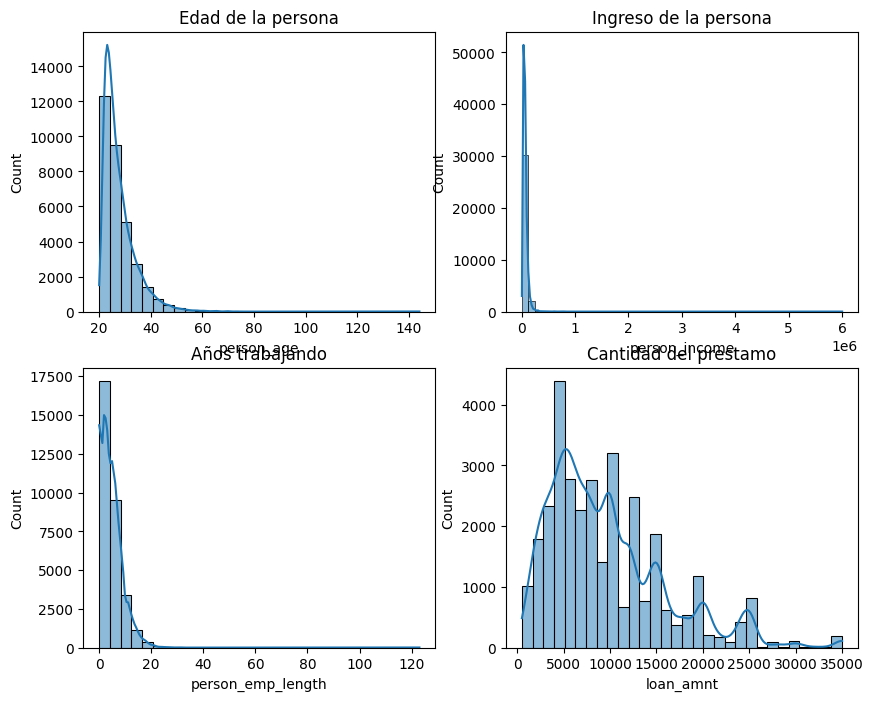

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(x=df['person_age'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Edad de la persona")
sns.histplot(x=df['person_income'], bins=50, kde=True, ax=axes[0,1])
axes[0,1].set_title("Ingreso de la persona")
sns.histplot(x=df['person_emp_length'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Años trabajando")
sns.histplot(x=df['loan_amnt'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Cantidad del prestamo")
plt.show()

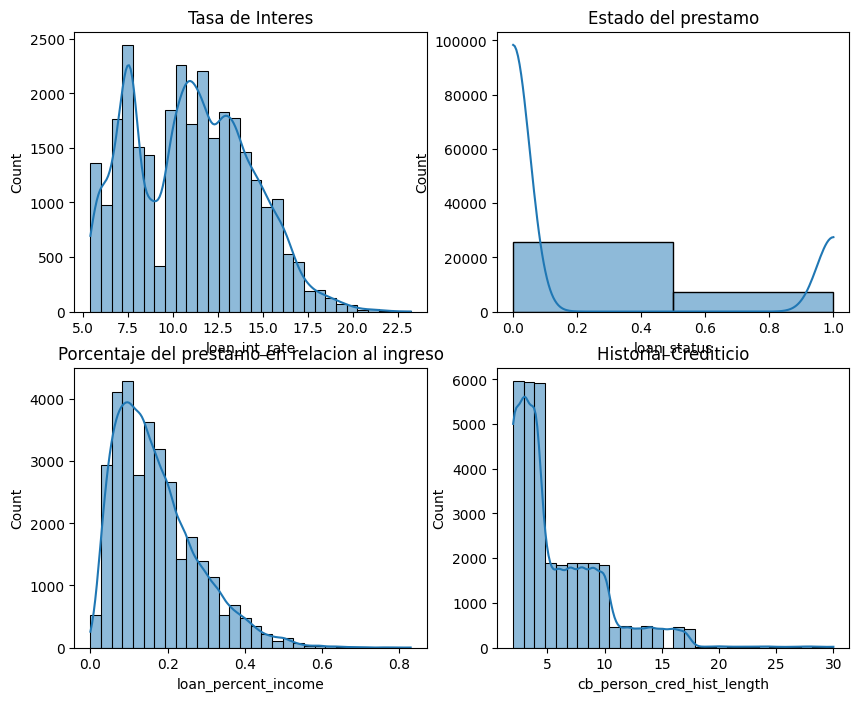

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(x=df['loan_int_rate'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Tasa de Interes")
sns.histplot(x=df['loan_status'], bins=2, kde=True, ax=axes[0,1])
axes[0,1].set_title("Estado del prestamo")
sns.histplot(x=df['loan_percent_income'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Porcentaje del prestamo en relacion al ingreso")
sns.histplot(x=df['cb_person_cred_hist_length'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Historial Crediticio")
plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

<font color="#0679c8">Podemos notar que la mayoria de las graficas muestran un sesgo a la derecha, son personas jovenes, con ingresos pequeños, pocos años trabajando, por tanto poco historial crediticio.</font>

Text(0.5, 1.0, 'Cantidad del prestamo')

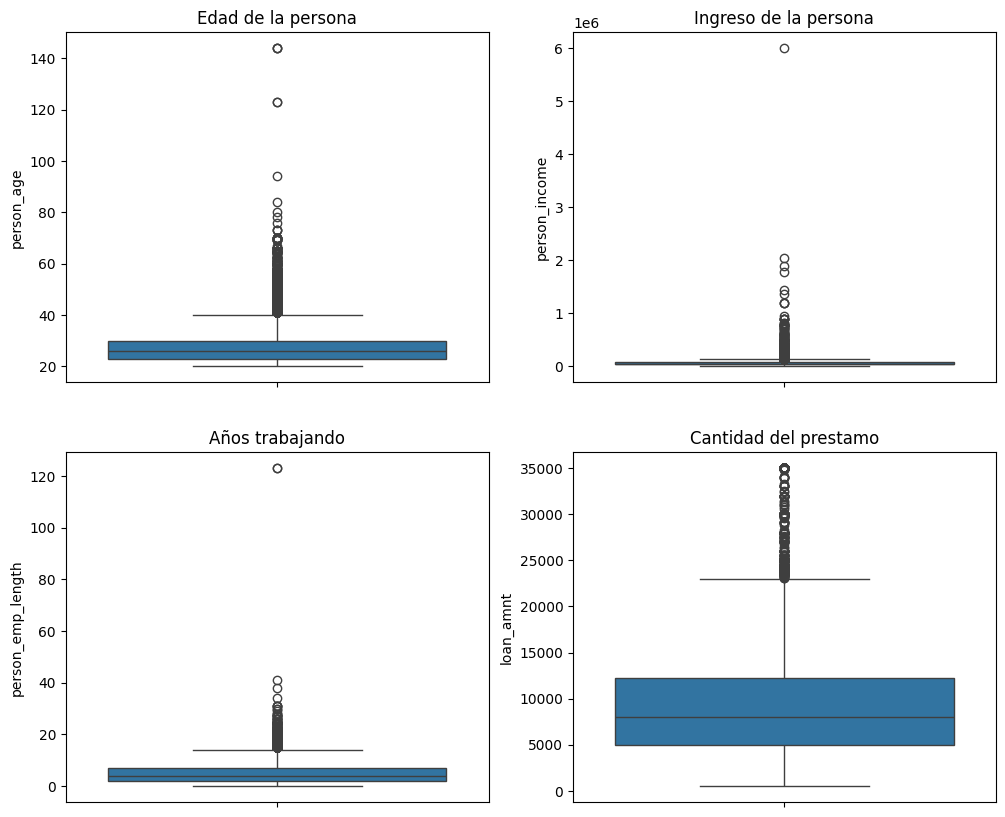

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df['person_age'], ax=ax[0, 0])
ax[0, 0].set_title("Edad de la persona")
sns.boxplot(y=df['person_income'], ax=ax[0, 1])
ax[0, 1].set_title("Ingreso de la persona")
sns.boxplot(y=df['person_emp_length'], ax=ax[1, 0])
ax[1, 0].set_title("Años trabajando")
sns.boxplot(y=df['loan_amnt'], ax=ax[1, 1])
ax[1, 1].set_title("Cantidad del prestamo")

Text(0.5, 1.0, 'Historial Crediticio')

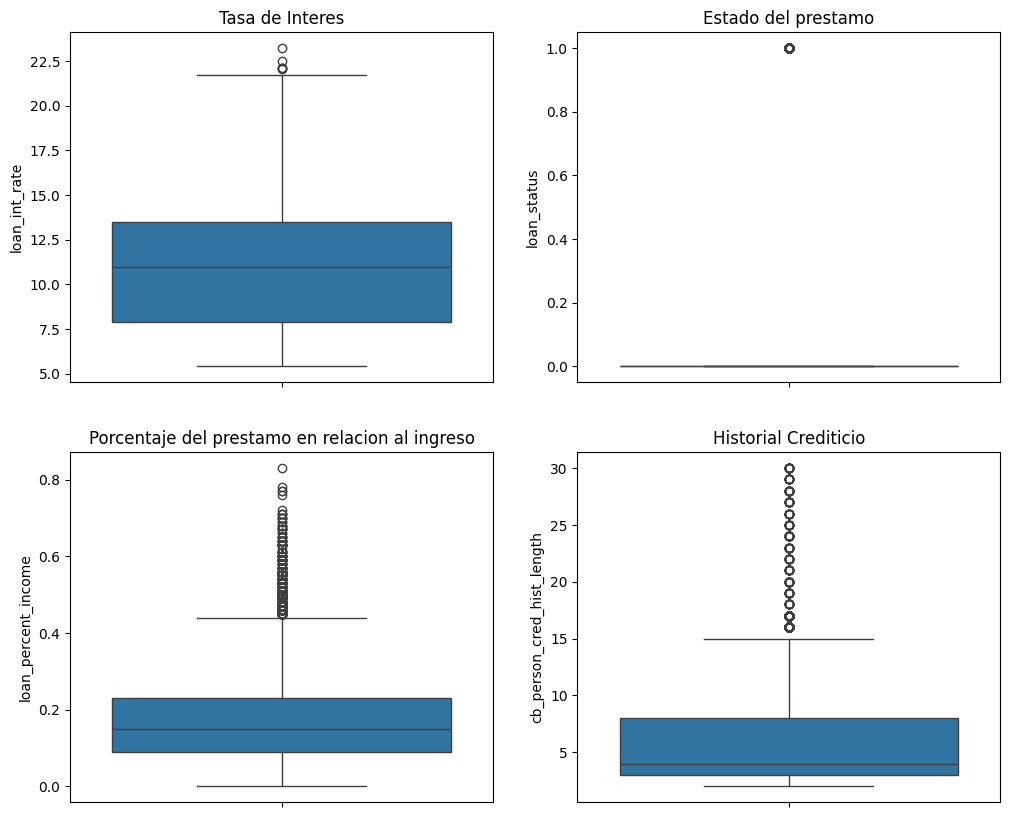

In [93]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df['loan_int_rate'], ax=ax[0, 0])
ax[0, 0].set_title("Tasa de Interes")
sns.boxplot(y=df['loan_status'], ax=ax[0, 1])
ax[0, 1].set_title("Estado del prestamo")
sns.boxplot(y=df['loan_percent_income'], ax=ax[1, 0])
ax[1, 0].set_title("Porcentaje del prestamo en relacion al ingreso")
sns.boxplot(y=df['cb_person_cred_hist_length'], ax=ax[1, 1])
ax[1, 1].set_title("Historial Crediticio")

* Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

<font color="#0679c8">Para person_age se encontraron 1494 valores atipicos (4.5%)</font>

In [94]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)

<font color="#0679c8">Con la moda podemos decir que es mas frecuente que una persona rente, que use el prestamo para educacion, que tenga un prestamos de grado A y que no tenga incumplimiento de pago</font>
*   Cardinalidad (cantidad de valores únicos)

<font color="#0679c8">Para person_home_ownership tenemos 4 valores unicos, loan_intent tiene 6, loan_grade tiene 7 y cb_person_default_on_file solo 2 </font>
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [95]:
df.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [96]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [97]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6453
MEDICAL,6071
VENTURE,5719
PERSONAL,5521
DEBTCONSOLIDATION,5212
HOMEIMPROVEMENT,3605


In [98]:
df['loan_grade'].value_counts()

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


In [99]:
df['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
N,26836
Y,5745


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

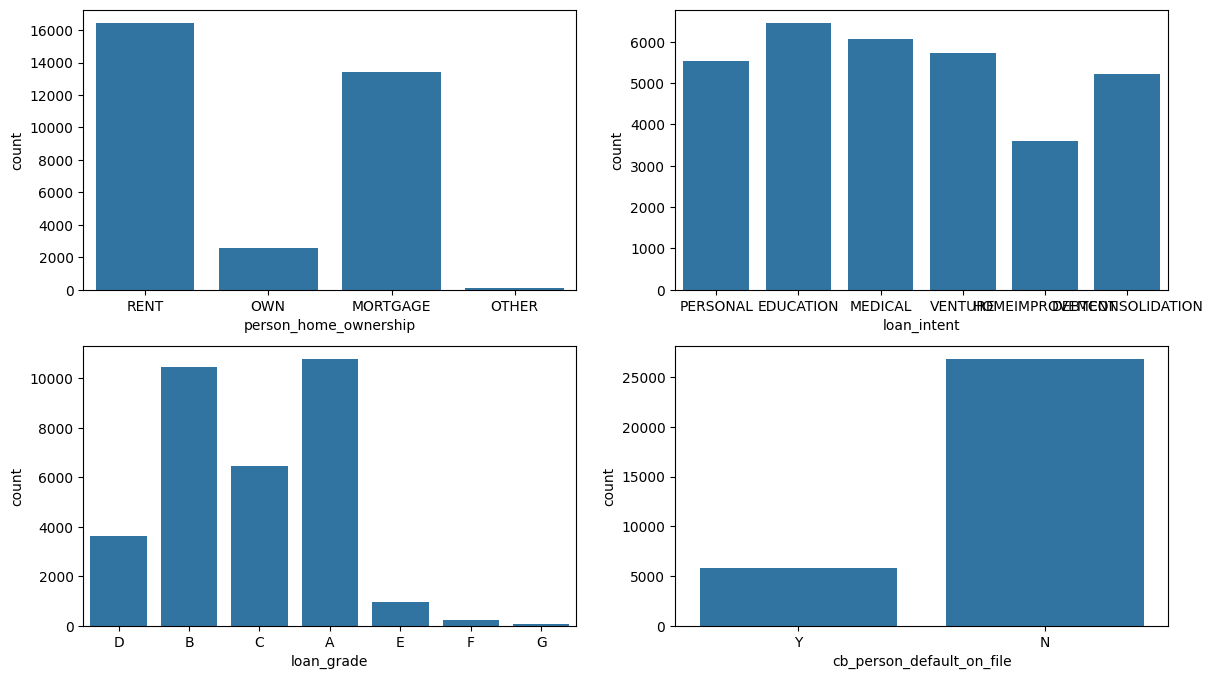

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
sns.countplot(x='person_home_ownership', data=df, ax=axes[0, 0])
sns.countplot(x='loan_intent', data=df, ax=axes[0, 1])
sns.countplot(x='loan_grade', data=df, ax=axes[1, 0])
sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1, 1])
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

<font color="#0679c8">Es una relación de aceptación basada en el porcentaje del préstamo. Nos dice que es más probable que un préstamo sea aceptado si el porcentaje del préstamo es mayor, en relación con tu ingreso.</font>

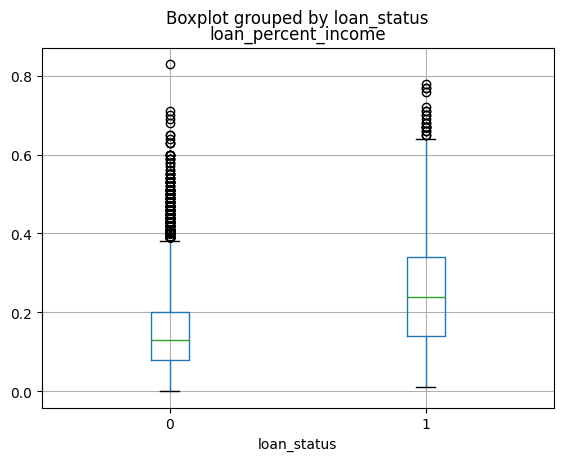

In [101]:
df.boxplot(column='loan_percent_income', by='loan_status')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

 <font color="#0679c8">Con esta division, podemos notar mas la acentuacion en el rechazo de los prestamos (status = 0).</font>

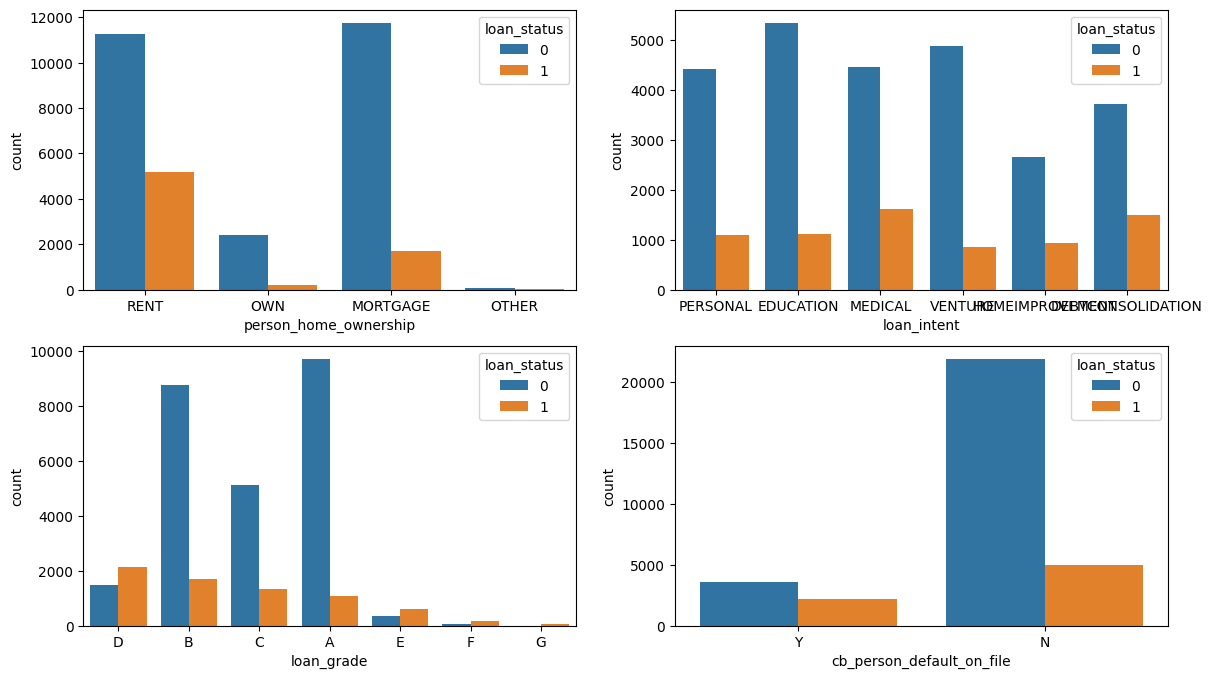

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
sns.countplot(x='person_home_ownership', data=df, ax=axes[0, 0], hue='loan_status')
sns.countplot(x='loan_intent', data=df, ax=axes[0, 1], hue='loan_status')
sns.countplot(x='loan_grade', data=df, ax=axes[1, 0], hue='loan_status')
sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1, 1], hue='loan_status')
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<font color="#0679c8">loan_percent_income tiene la correlacion mas fuerte (0.38)</font>

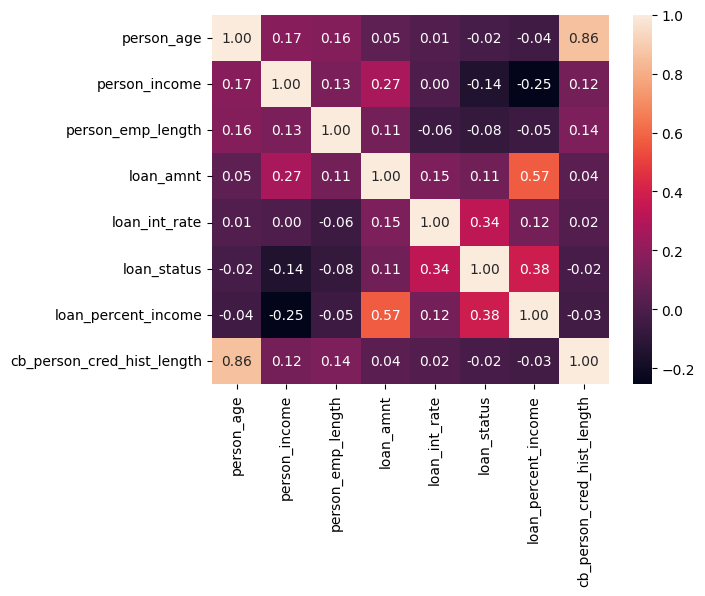

In [103]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()